In [2]:
! pip install mplfinance -q

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

pd.set_option('display.float_format', lambda x: '%.3f' % x)
palette = sns.color_palette('Spectral')
pastel = sns.color_palette('pastel')

In [8]:
df = pd.read_csv(r"C:\Users\Vishn\Downloads\Mastercard_stock_history.csv")
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.749,4.284,3.740,4.279,395343000,0.000,0.000
1,2006-05-26,4.307,4.348,4.103,4.180,103044000,0.000,0.000
2,2006-05-30,4.183,4.184,3.986,4.093,49898000,0.000,0.000
3,2006-05-31,4.126,4.220,4.126,4.181,30002000,0.000,0.000
4,2006-06-01,4.180,4.475,4.177,4.420,62344000,0.000,0.000
...,...,...,...,...,...,...,...,...
3867,2021-10-05,347.121,348.130,342.497,342.777,4724100,0.000,0.000
3868,2021-10-06,339.581,348.440,338.682,348.250,3712000,0.000,0.000
3869,2021-10-07,349.000,357.900,349.000,353.910,3209200,0.440,0.000
3870,2021-10-08,356.000,360.370,354.210,354.960,2336700,0.000,0.000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volume        3872 non-null   int64  
 6   Dividends     3872 non-null   float64
 7   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB


In [12]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000,3872.000,3872.000,3872.000,3872.000,3872.000,3872.000
mean,104.897,105.956,103.769,104.883,12322502.686,0.002,0.003
std,106.246,107.304,105.050,106.169,17596652.449,0.026,0.161
min,3.749,4.102,3.740,4.084,641100.000,0.000,0.000
25%,22.347,22.638,22.034,22.300,3529475.000,0.000,0.000
50%,70.810,71.376,70.224,70.856,5891750.000,0.000,0.000
75%,147.688,148.645,146.822,147.688,13197750.000,0.000,0.000
max,392.654,400.521,389.748,394.686,395343000.000,0.440,10.000


In [14]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [16]:
df.isna().sum() / df.shape[0]

Date           0.000
Open           0.000
High           0.000
Low            0.000
Close          0.000
Volume         0.000
Dividends      0.000
Stock Splits   0.000
dtype: float64

In [18]:
df.duplicated().sum()

0

In [20]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

<Axes: >

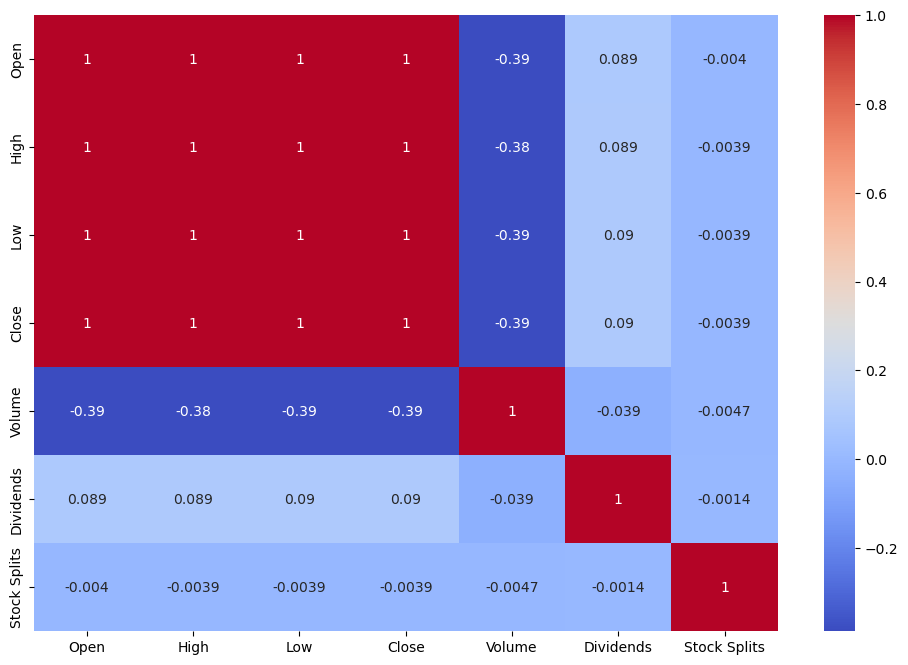

In [22]:
corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [24]:
df[cat_cols].nunique()

Date    3872
dtype: int64

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Dividends'}>],
       [<Axes: title={'center': 'Stock Splits'}>, <Axes: >, <Axes: >]],
      dtype=object)

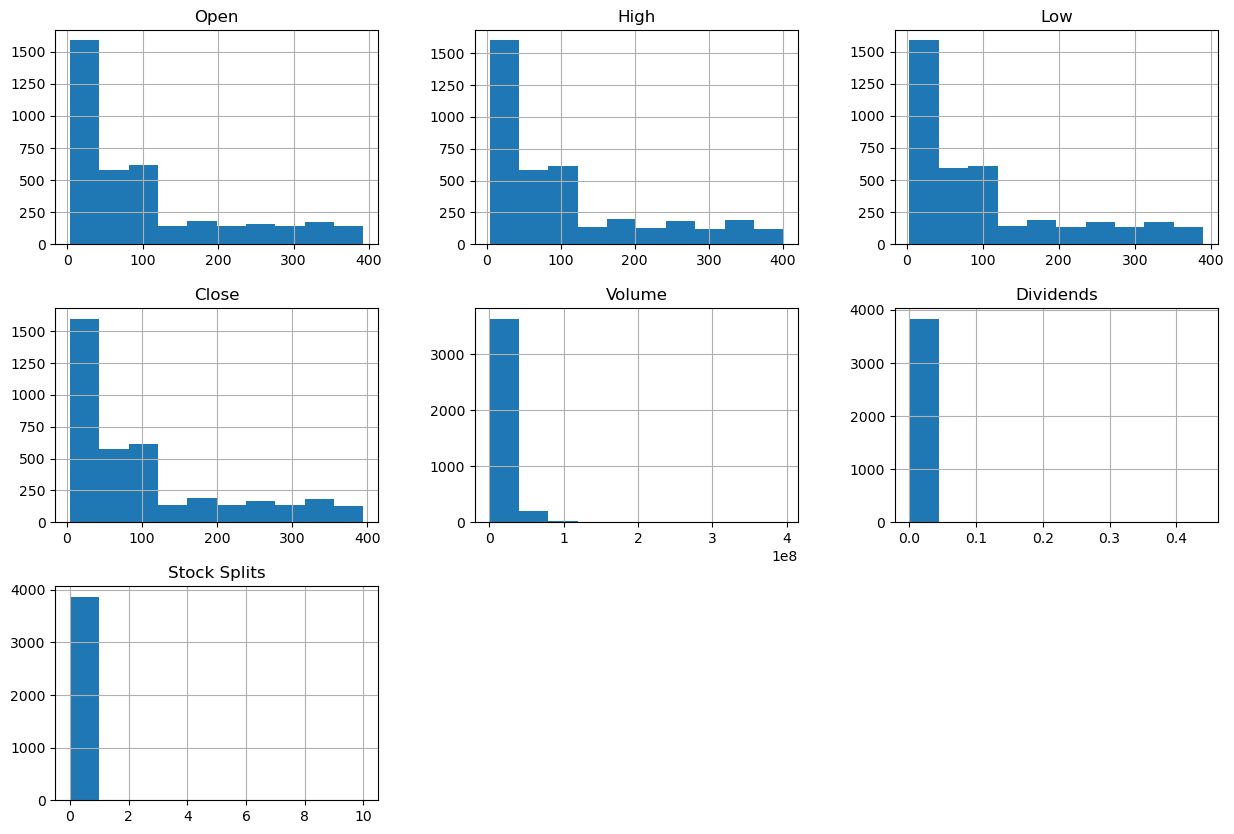

In [26]:
df.hist(figsize=(15, 10))

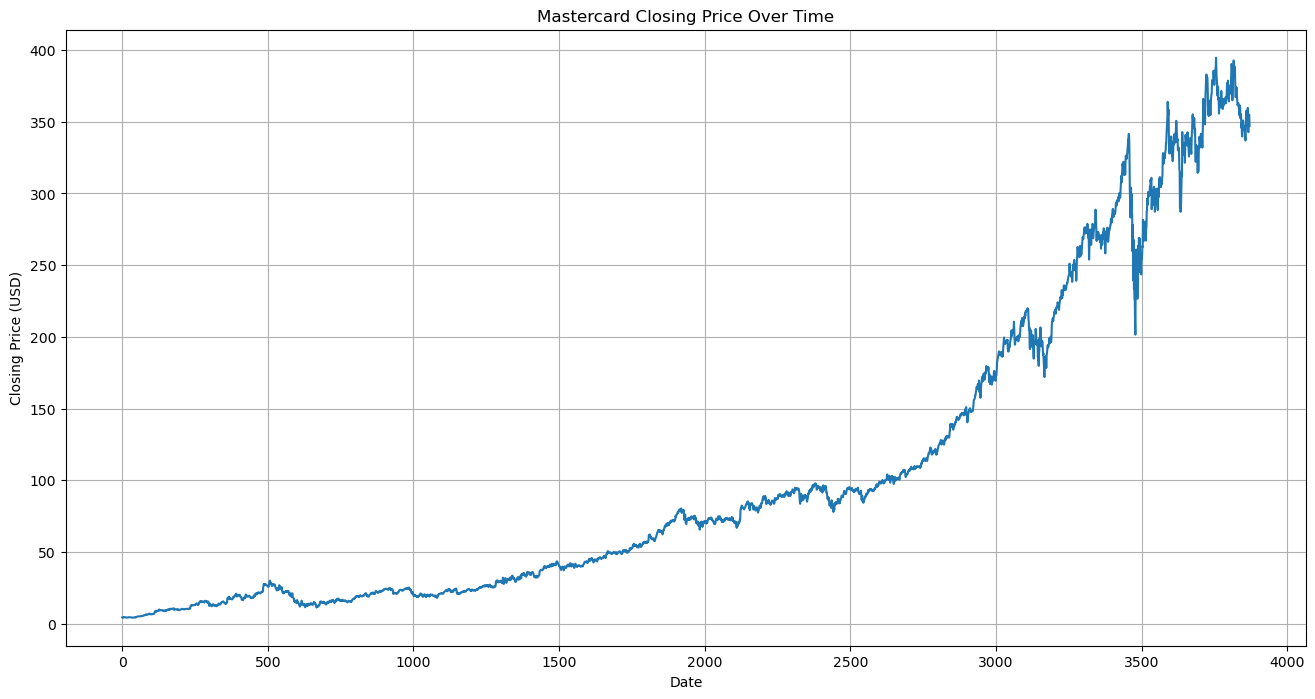

In [34]:
plt.figure(figsize=(16, 8))
plt.plot(df['Close'])
plt.title('Mastercard Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)

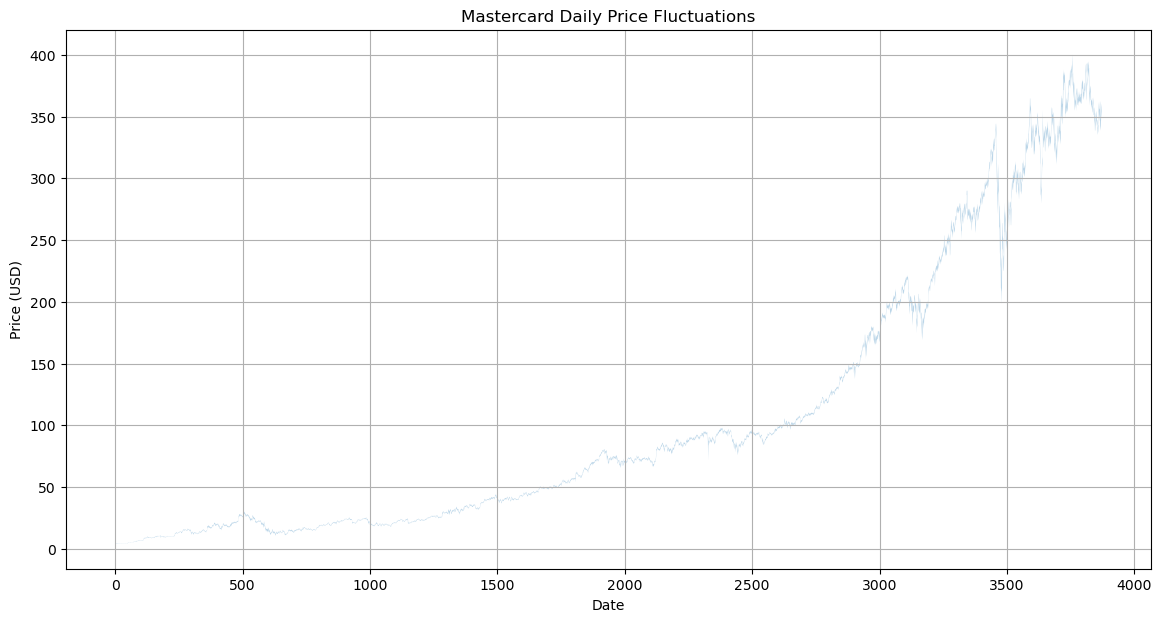

In [36]:
plt.figure(figsize=(14, 7))
plt.fill_between(df.index, df['High'], df['Low'], alpha=0.3)
plt.title('Mastercard Daily Price Fluctuations')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

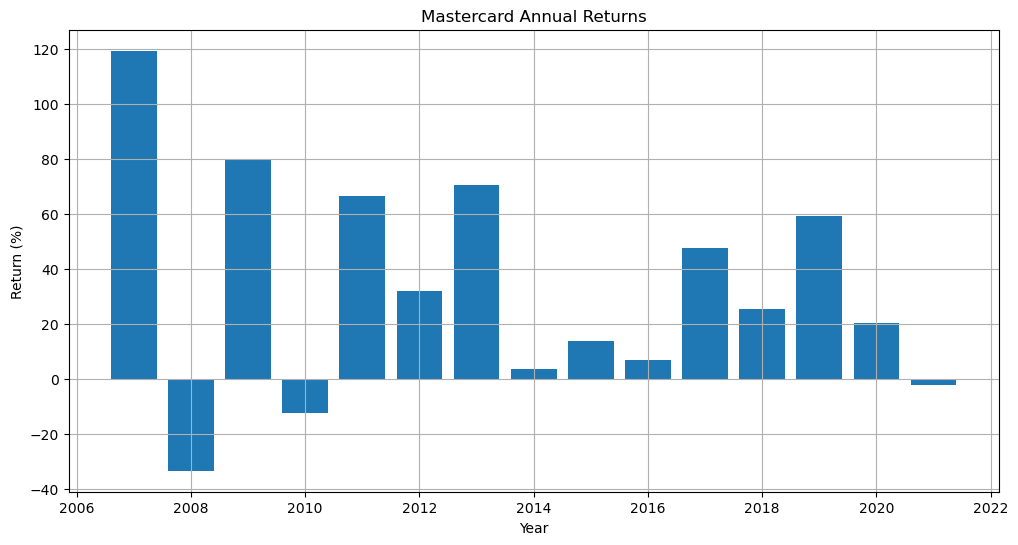

In [38]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Now resample and calculate yearly returns
yearly_returns = df['Close'].resample('YE').ffill().pct_change()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(yearly_returns.index.year, yearly_returns.values * 100)
plt.title('Mastercard Annual Returns')
plt.xlabel('Year')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()

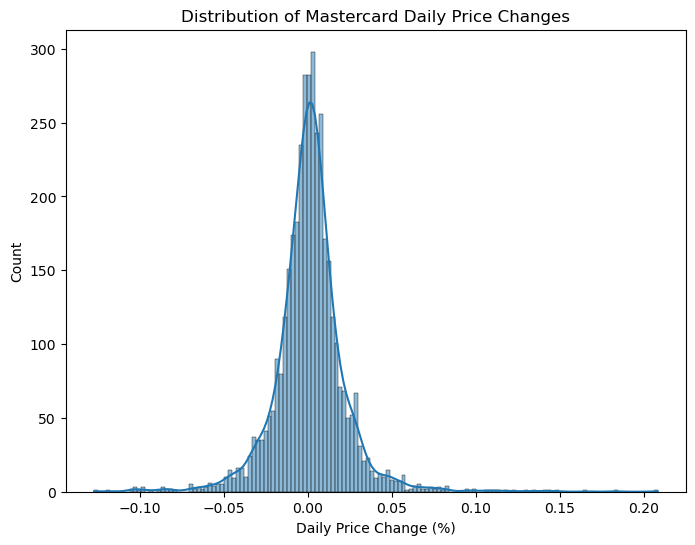

In [40]:
daily_changes = df['Close'].pct_change()

plt.figure(figsize=(8, 6))
sns.histplot(daily_changes, kde=True)
plt.title('Distribution of Mastercard Daily Price Changes')
plt.xlabel('Daily Price Change (%)')
plt.show()

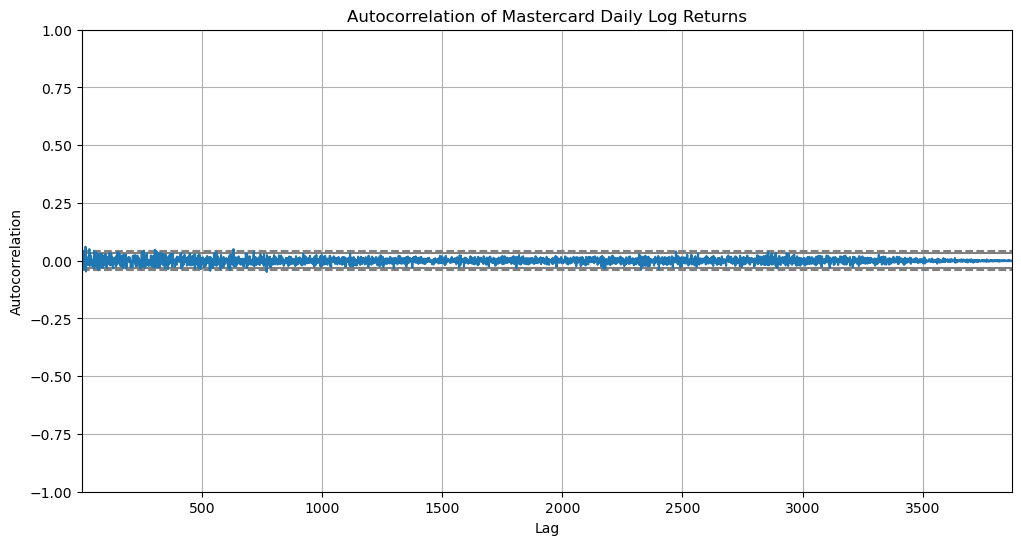

In [57]:
from pandas.plotting import autocorrelation_plot
df['Log Returns'] = np.log(df['Close'] / df['Close'].shift(1))
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['Log Returns'].dropna())
plt.title('Autocorrelation of Mastercard Daily Log Returns')
plt.show()

<Figure size 1400x700 with 0 Axes>

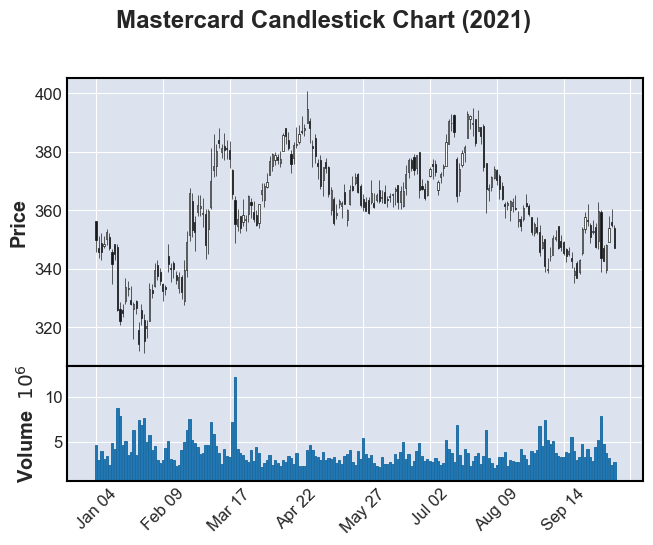

In [59]:
import mplfinance as mpf 
plt.figure(figsize=(14, 7))

mpf.plot(df['2021-01-01':], type='candle', volume=True, 
         title='Mastercard Candlestick Chart (2021)')

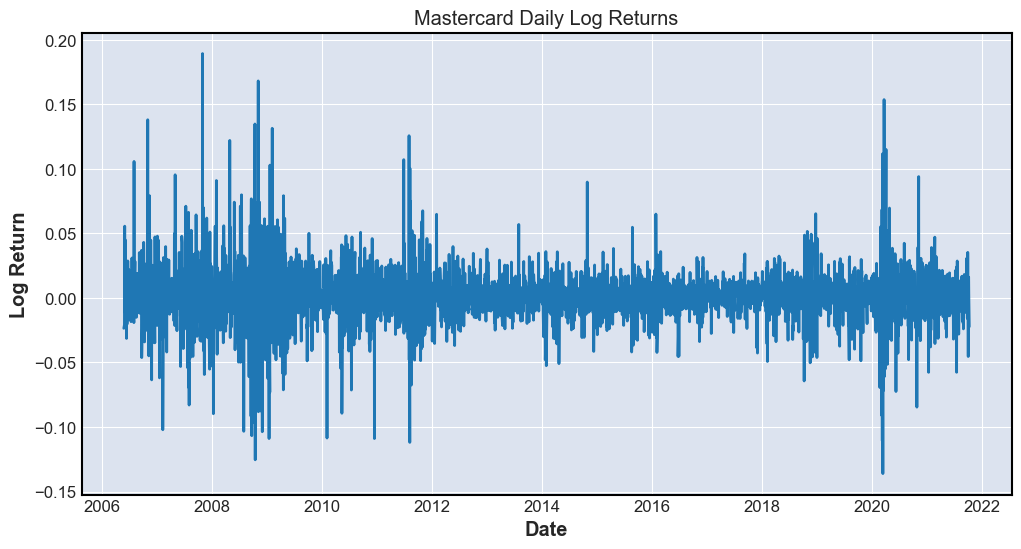

In [61]:
# Daily Log Returns
df['Log Returns'] = np.log(df['Close'] / df['Close'].shift(1))

plt.figure(figsize=(12, 6))
plt.plot(df['Log Returns'])
plt.title('Mastercard Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

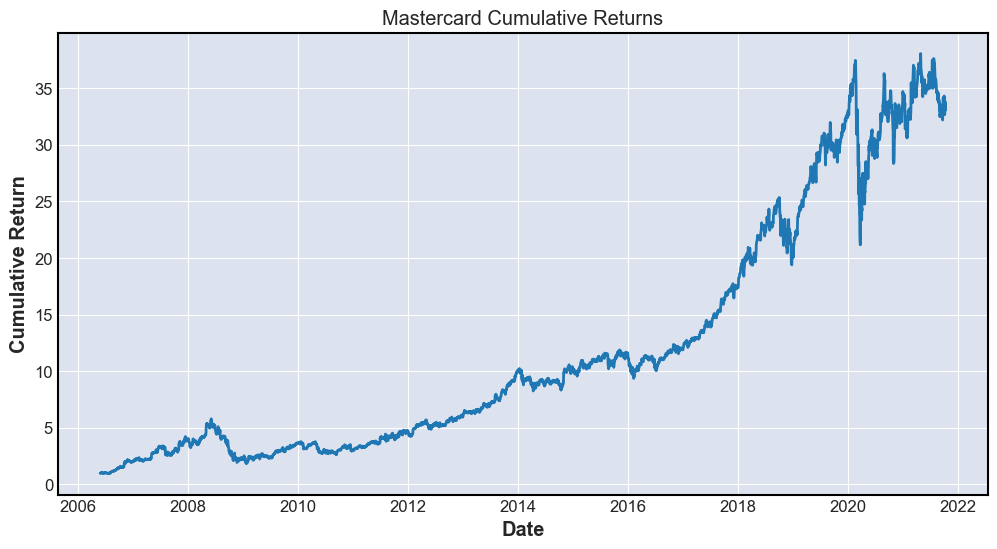

In [62]:
# Cumulative Returns
df['Cumulative Returns'] = (1 + df['Log Returns']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(df['Cumulative Returns'])
plt.title('Mastercard Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

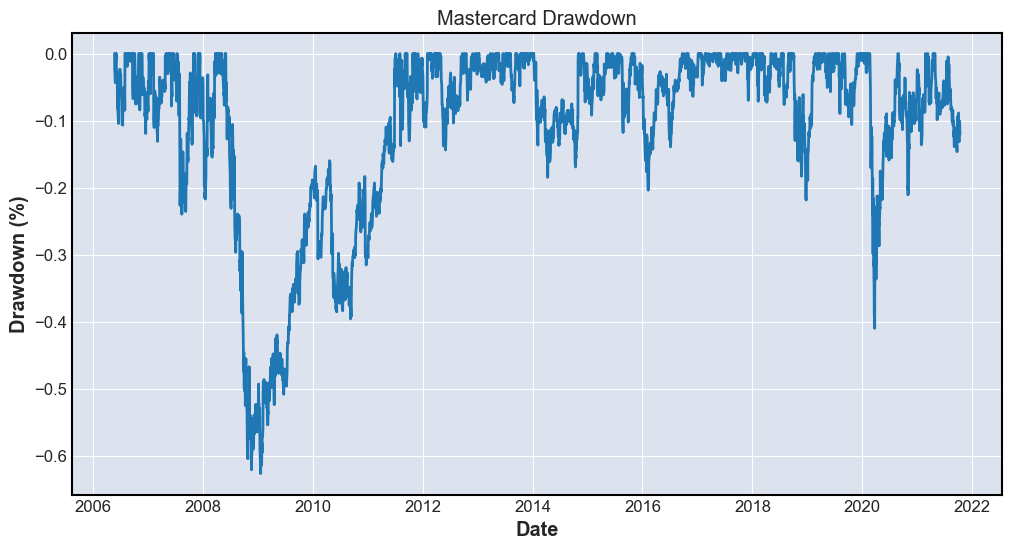

In [65]:
# Calculate drawdown
peak = df['Close'].cummax()
drawdown = (df['Close'] - peak) / peak

plt.figure(figsize=(12, 6))
plt.plot(drawdown)
plt.title('Mastercard Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.grid(True)
plt.show()

C:\Users\Vishn\AppData\Local\Temp\ipykernel_6140\1017469181.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = df['Close'].resample('M').std()


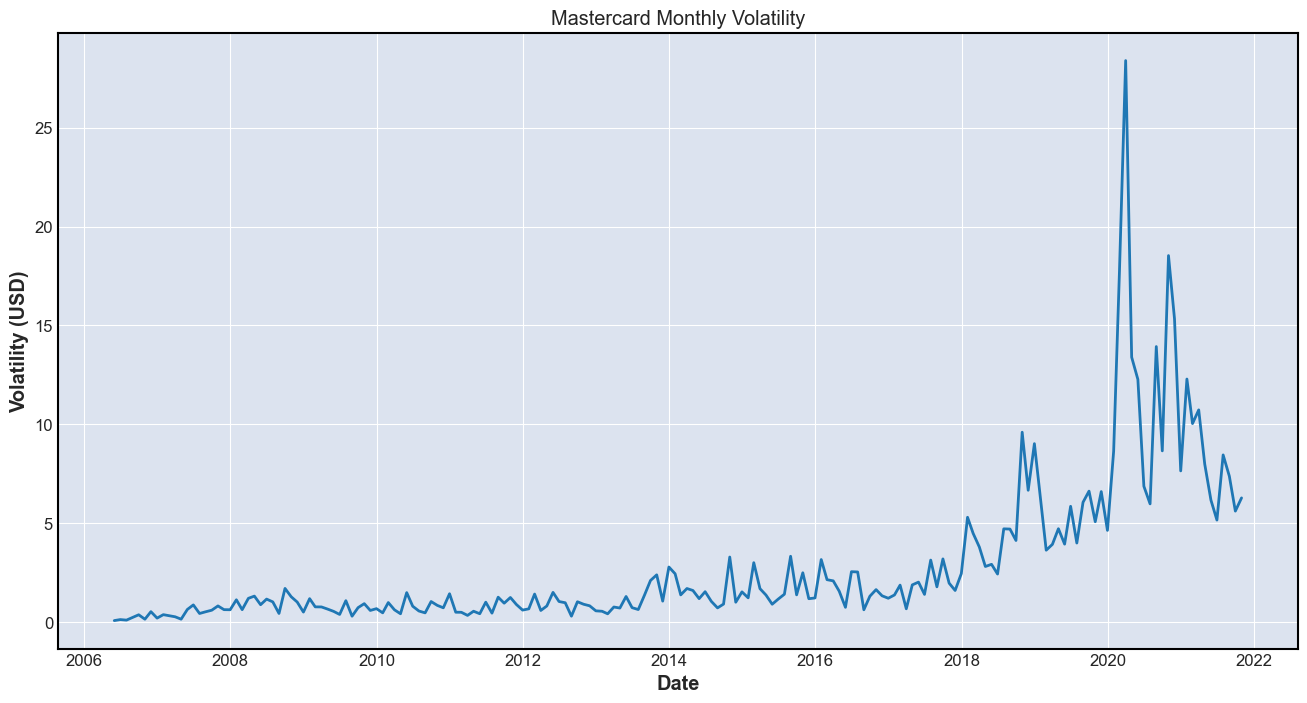

In [67]:
monthly_volatility = df['Close'].resample('M').std()

plt.figure(figsize=(16, 8))
plt.plot(monthly_volatility)
plt.title('Mastercard Monthly Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (USD)')
plt.grid(True)
plt.show()

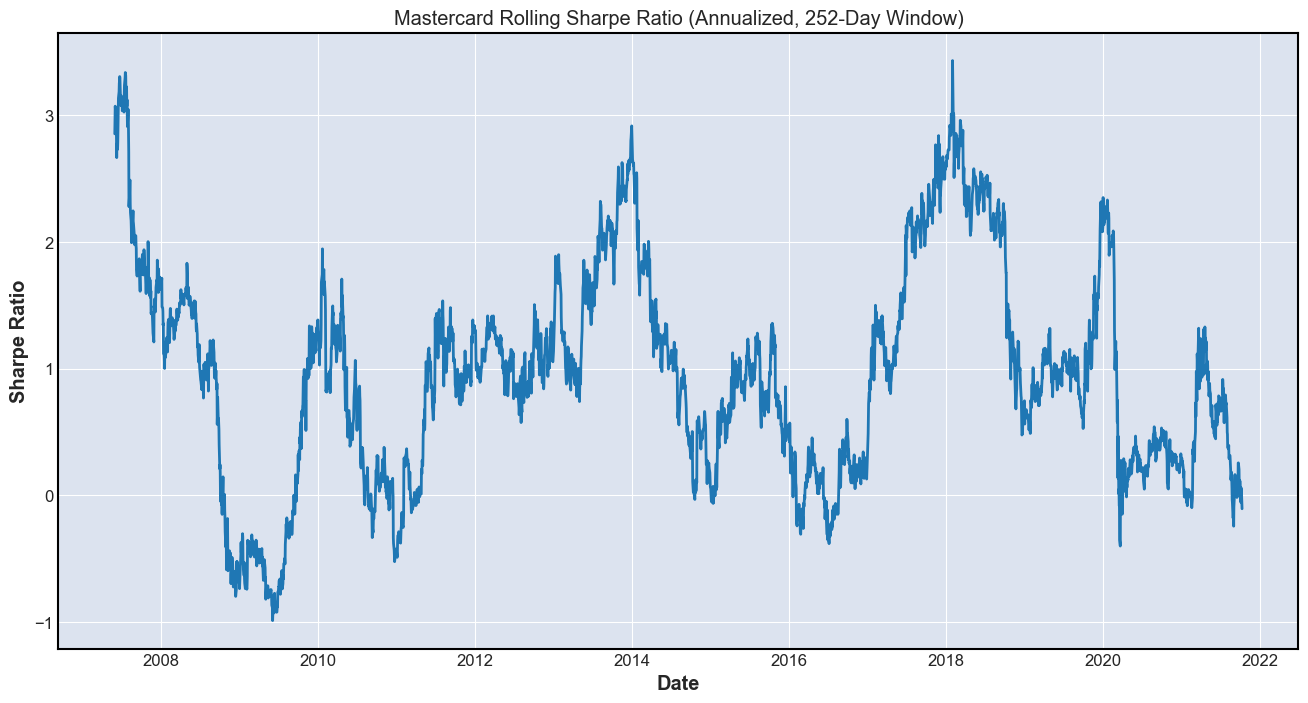

In [69]:
risk_free_rate = 0.02  # Example rate
df['Excess Returns'] = df['Log Returns'] - risk_free_rate / 252  # Daily risk-free rate
df['Rolling Sharpe'] = df['Excess Returns'].rolling(window=252).mean() / df['Excess Returns'].rolling(window=252).std() * np.sqrt(252)

plt.figure(figsize=(16, 8))
plt.plot(df['Rolling Sharpe'])
plt.title('Mastercard Rolling Sharpe Ratio (Annualized, 252-Day Window)')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()

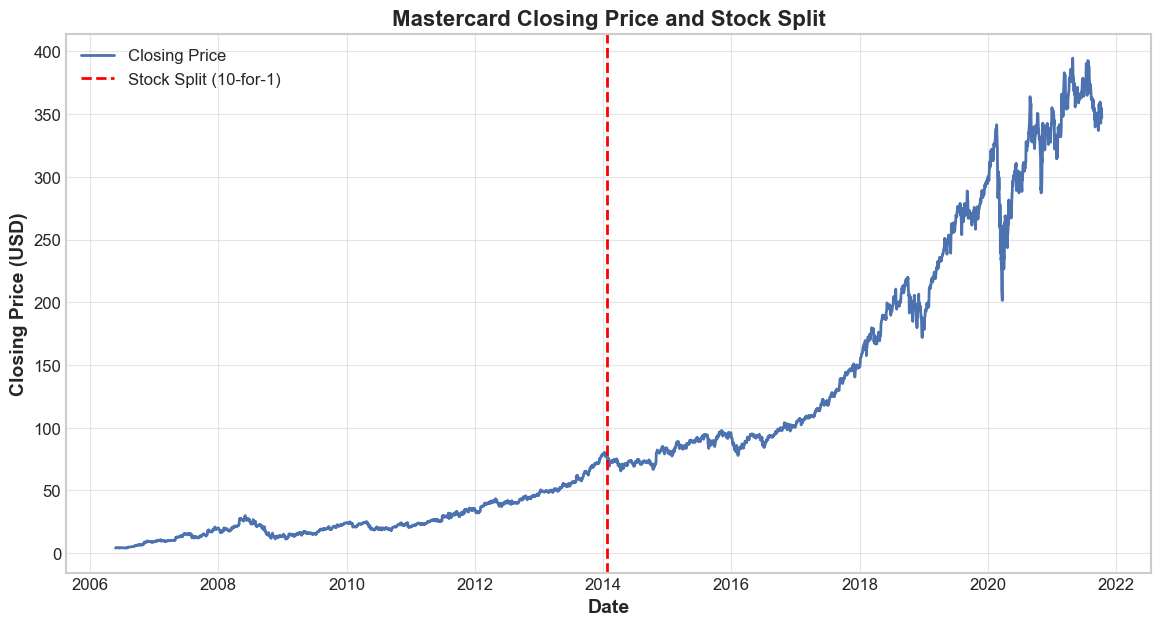

In [70]:
sns.set_style("whitegrid")
palette = sns.color_palette("deep")

crisis_start_2020 = pd.to_datetime('2020-03-01')
crisis_end_2020 = pd.to_datetime('2020-04-30')
crisis_start_2008 = pd.to_datetime('2008-09-15')
crisis_end_2008 = pd.to_datetime('2009-06-30')

# --- 1. Stock Split Visualization ---
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price', color=palette[0], linewidth=2)
plt.axvline(pd.to_datetime('2014-01-22'), color='red', linestyle='--', linewidth=2, label='Stock Split (10-for-1)')
plt.title('Mastercard Closing Price and Stock Split', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()


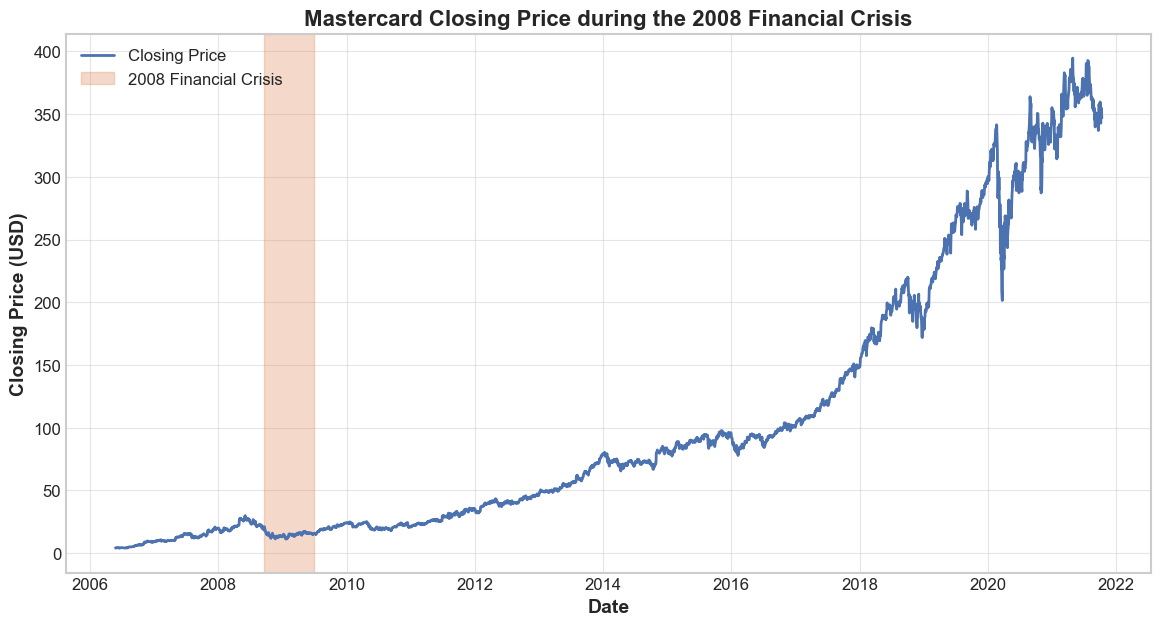

In [73]:
# --- 2a. 2008 Financial Crisis Impact ---
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price', color=palette[0], linewidth=2)
plt.axvspan(crisis_start_2008, crisis_end_2008, color=palette[1], alpha=0.3, label='2008 Financial Crisis')
plt.title('Mastercard Closing Price during the 2008 Financial Crisis', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()

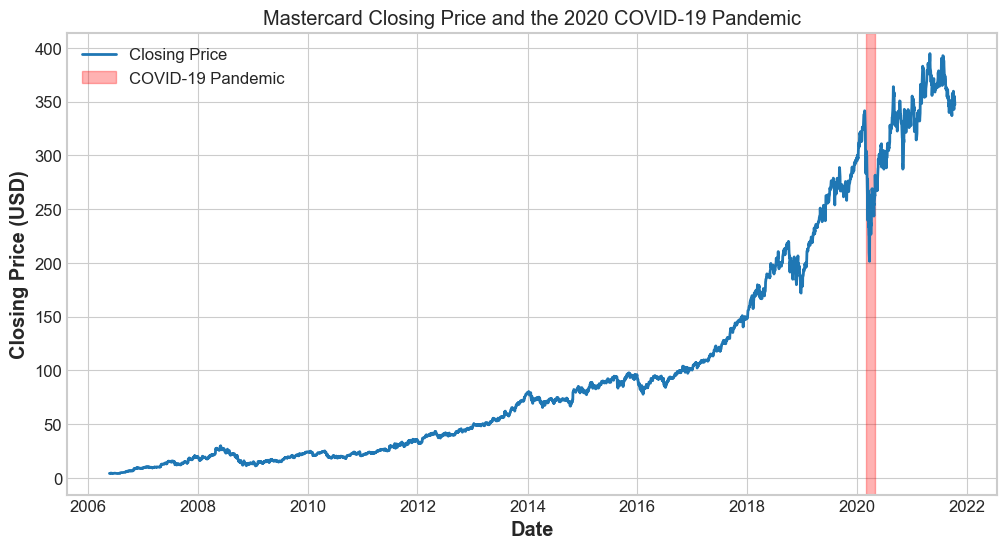

In [75]:
# 2b. 2020 COVID-19 Pandemic Impact


plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price')
plt.axvspan(crisis_start_2020, crisis_end_2020, color='red', alpha=0.3, label='COVID-19 Pandemic')
plt.title('Mastercard Closing Price and the 2020 COVID-19 Pandemic')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

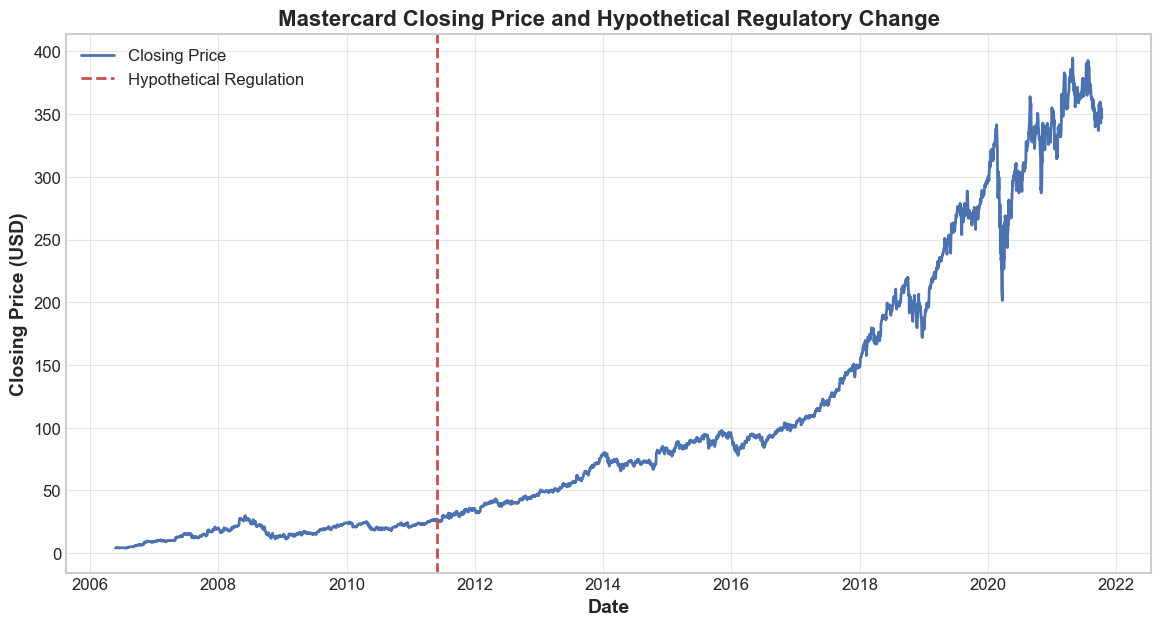

In [77]:
# --- 3. Hypothetical Regulation Impact ---
regulation_date = pd.to_datetime('2011-06-01')  # Hypothetical date
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price', color=palette[0], linewidth=2)
plt.axvline(regulation_date, color=palette[3], linestyle='--', linewidth=2, label='Hypothetical Regulation')
plt.title('Mastercard Closing Price and Hypothetical Regulatory Change', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()

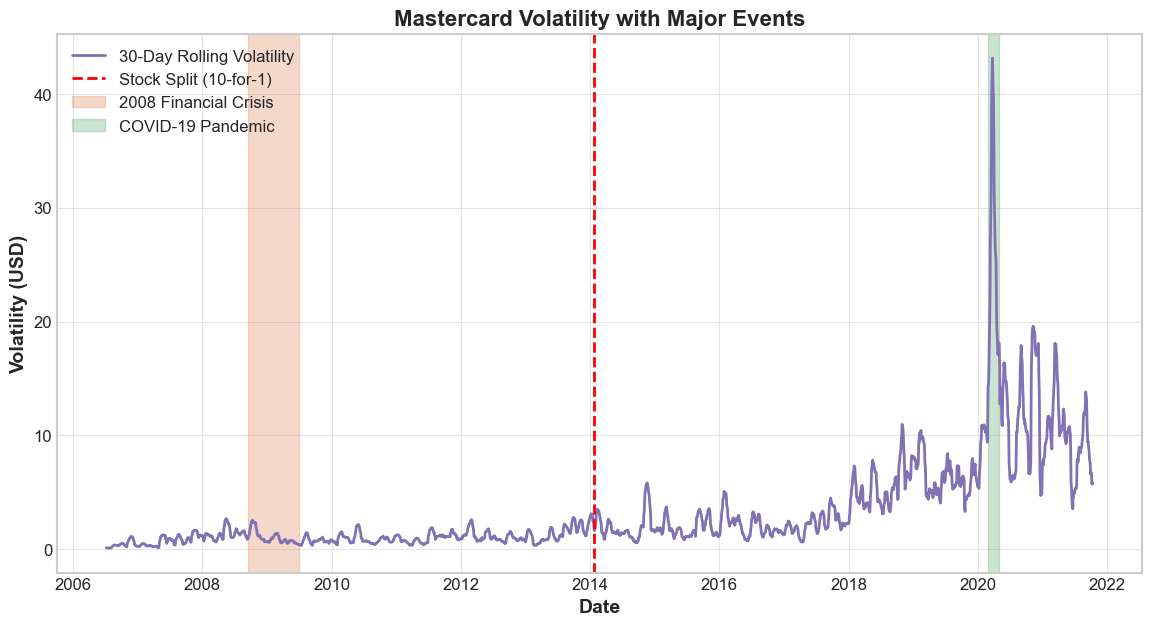

In [79]:
# --- Additional Visualizations (Volatility) ---
df['Volatility'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Volatility'], label='30-Day Rolling Volatility', color=palette[4], linewidth=2)
plt.axvline(pd.to_datetime('2014-01-22'), color='red', linestyle='--', linewidth=2, label='Stock Split (10-for-1)')
plt.axvspan(crisis_start_2008, crisis_end_2008, color=palette[1], alpha=0.3, label='2008 Financial Crisis')
plt.axvspan(crisis_start_2020, crisis_end_2020, color=palette[2], alpha=0.3, label='COVID-19 Pandemic')
plt.title('Mastercard Volatility with Major Events', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volatility (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()

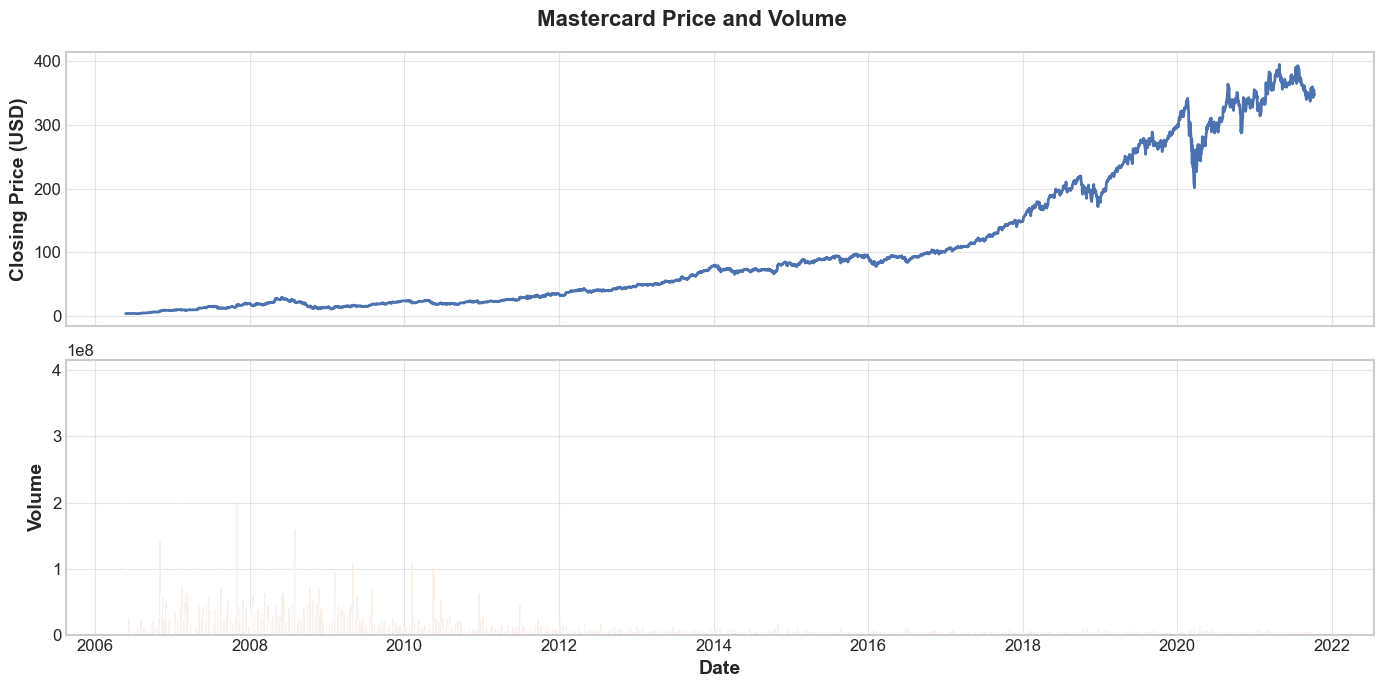

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 7), sharex=True)

# Price Chart on Top
axes[0].plot(df['Close'], label='Closing Price', color=palette[0], linewidth=2)
axes[0].set_ylabel('Closing Price (USD)', fontsize=14)
axes[0].grid(True, alpha=0.5)

# Volume Chart on Bottom
axes[1].bar(df.index, df['Volume'], color=palette[1], alpha=0.6)
axes[1].set_ylabel('Volume', fontsize=14)
axes[1].grid(True, alpha=0.5)

plt.suptitle('Mastercard Price and Volume', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=12)
fig.tight_layout()
plt.show()

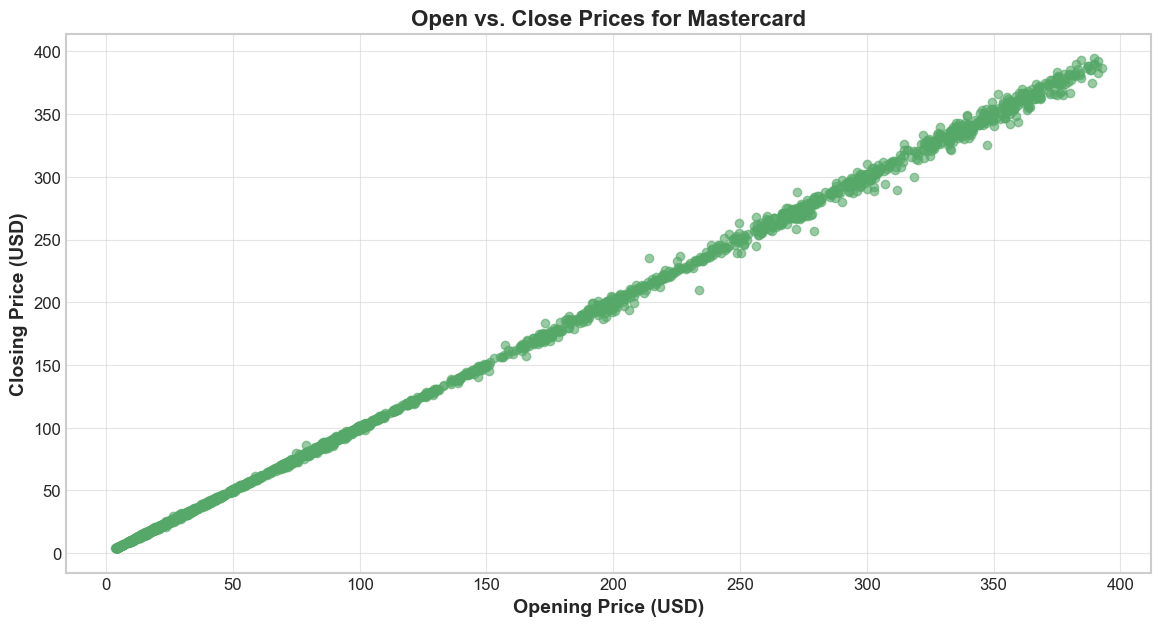

In [85]:
# --- Open-Close Relationship ---
plt.figure(figsize=(14, 7))
plt.scatter(df['Open'], df['Close'], alpha=0.6, color=palette[2])
plt.xlabel('Opening Price (USD)', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)
plt.title('Open vs. Close Prices for Mastercard', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.5)